In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
# https://www.kaggle.com/datasets/reihanenamdari/fire-incidents

In [45]:
# Area_of_Origin - Obszar pochodzenia
# Business_Impact - Wpływ na biznes
# Civilian_Casualties - Ofiary cywilne
# Count_of_Persons_Rescued - Liczba uratowanych osób
# Estimated_Dollar_Loss - Szacowana strata dolara
# Estimated_Number_Of_Persons_Displaced - Szacunkowa liczba osób wysiedlonych
# Ext_agent_app_or_defer_time - Sygnatura czasowa agenta zastosowanego po raz pierwszy lub decyzja o odroczeniu
# Extent_Of_Fire - Kod i opis zasięgu pożaru
# Fire_Alarm_System_Impact_on_Evacuation - Wpływ systemu sygnalizacji pożaru na kod i opis ewakuacji
# Fire_Alarm_System_Operation - Kod i opis działania systemu sygnalizacji pożaru
# Fire_Alarm_System_Presence - Kod i opis obecności systemu sygnalizacji pożaru
# Fire_Under_Control_Time - Znacznik czasu pożaru pod kontrolą
# Ignition_Source - Źródło zapłonu
# Incident_Station_Area - Obszar stacji TFS, w którym doszło do zdarzenia
# Incident_Ward - Oddział, w którym doszło do zdarzenia, jeśli jest dostępny
# Last_TFS_Unit_Clear_Time - Sygnatura czasowa ostatniej jednostki oczyszczonej z incydentu
# Latitude - Szerokość geograficzna najbliższego większego lub mniejszego skrzyżowania w okręgu zdarzenia 
# Longitude - Długość geograficzna najbliższego większego lub mniejszego skrzyżowania w okręgu zdarzenia
# Material_First_Ignited - Materiał uległ pierwszemu zapaleniu
# Method_Of_Fire_Control - Kod i opis metody kontroli ognia OFM
# Possible_Cause - Możliwy kod przyczyny i opis
# Property_Use - Kod i opis użytkowania nieruchomości
# Smoke_Alarm_at_Fire_Origin_Alarm_Failure - Kod i opis awarii czujnika dymu w alarmie źródła pożaru
# Smoke_Alarm_at_Fire_Origin_Alarm_Type - Alarm dymu i źródła pożaru Kod typu i opis
# Status_of_Fire_On_Arrival - Kod i opis stanu pożaru w dniu przyjazdu
# TFS_Alarm_Time - Sygnatura czasowa powiadomienia TFS o incydencie
# TFS_Arrival_Time - Znacznik czasu pierwszej jednostki przybywającej do zdarzenia

In [ ]:
### Cel: wykrycie sytuacji w której pożar zagraża ludziom
### Stakeholder: straż pożarna pracująca nad systemem wczesnego ostrzegania oraz reagowania na zagrożenia pożarowe

In [455]:
pd.set_option('display.max_columns', None)

# Konfiguracja pandas, aby wyświetlał wszystkie kolumny DataFrame

In [456]:
# Read train dataset 
df = pd.read_csv('CSV/Fire-Incidents.csv')

In [457]:
df.head()

,Area_of_Origin,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Last_TFS_Unit_Clear_Time,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,No business interruption,0,86,3000,0,2018-08-24T17:06:26,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24T17:06:28,Undetermined,114,18.0,2018-08-24T17:42:43,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24T16:49:36,2018-08-24T16:54:09
1,Cooking Area or Kitchen,Undetermined,0,28,50000,28,2018-11-24T07:19:00,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24T07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,2018-11-24T12:45:21,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24T07:09:12,2018-11-24T07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",Not applicable (not a business),1,16,1000000,130,2017-02-09T18:02:13,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09T18:36:21,Undetermined,325,27.0,2017-02-09T23:36:33,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09T17:45:07,2017-02-09T17:48:49
3,Undetermined (formerly 98),May not resume operations,0,12,1000000,14,2012-10-30T00:52:04,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30T01:28:48,Undetermined,332,20.0,2012-11-01T16:30:31,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30T00:42:01,2012-10-30T00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",Not applicable (not a business),8,11,125000,2,2018-07-08T04:35:00,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08T04:38:28,Matches or Lighters (unable to distinguish),442,5.0,2018-07-08T16:44:07,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08T04:08:50,2018-07-08T04:13:54


In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11214 entries, 0 to 11213
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Area_of_Origin                            11214 non-null  object 
 1   Business_Impact                           11214 non-null  object 
 2   Civilian_Casualties                       11214 non-null  int64  
 3   Count_of_Persons_Rescued                  11214 non-null  int64  
 4   Estimated_Dollar_Loss                     11214 non-null  int64  
 5   Estimated_Number_Of_Persons_Displaced     11214 non-null  int64  
 6   Ext_agent_app_or_defer_time               11214 non-null  object 
 7   Extent_Of_Fire                            11214 non-null  object 
 8   Fire_Alarm_System_Impact_on_Evacuation    11214 non-null  object 
 9   Fire_Alarm_System_Operation               11214 non-null  object 
 10  Fire_Alarm_System_Presence        

In [459]:
df.describe()

,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Incident_Station_Area,Incident_Ward,Latitude,Longitude
count,11214.000000,11214.000000,1.121400e+04,11214.000000,11214.000000,11181.000000,11214.000000,11214.000000
mean,0.112538,0.062154,4.294369e+04,17.274835,288.281880,19.582685,43.705190,-79.403323
std,0.456429,0.962587,5.339367e+05,119.071696,107.515995,11.762782,0.051183,0.101086
min,0.000000,0.000000,0.000000e+00,0.000000,111.000000,1.000000,43.588926,-79.635241
25%,0.000000,0.000000,2.500000e+02,0.000000,221.000000,10.000000,43.662474,-79.479273
50%,0.000000,0.000000,2.500000e+03,0.000000,314.000000,19.000000,43.697050,-79.403892
75%,0.000000,0.000000,1.500000e+04,1.000000,346.000000,28.000000,43.747770,-79.337150
max,15.000000,86.000000,5.000000e+07,999.000000,445.000000,44.000000,43.846200,-79.124410


In [ ]:
## Data Cleaning

In [460]:
column_to_drop = ['Business_Impact', 'Estimated_Dollar_Loss', 'Estimated_Number_Of_Persons_Displaced', 'Ext_agent_app_or_defer_time', 'Last_TFS_Unit_Clear_Time']

In [461]:
df.drop(columns=column_to_drop, inplace= True)

In [462]:
df.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,0,86,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24T17:06:28,Undetermined,114,18.0,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24T16:49:36,2018-08-24T16:54:09
1,Cooking Area or Kitchen,0,28,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24T07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24T07:09:12,2018-11-24T07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",1,16,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09T18:36:21,Undetermined,325,27.0,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09T17:45:07,2017-02-09T17:48:49
3,Undetermined (formerly 98),0,12,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30T01:28:48,Undetermined,332,20.0,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30T00:42:01,2012-10-30T00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",8,11,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08T04:38:28,Matches or Lighters (unable to distinguish),442,5.0,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08T04:08:50,2018-07-08T04:13:54


<Axes: >

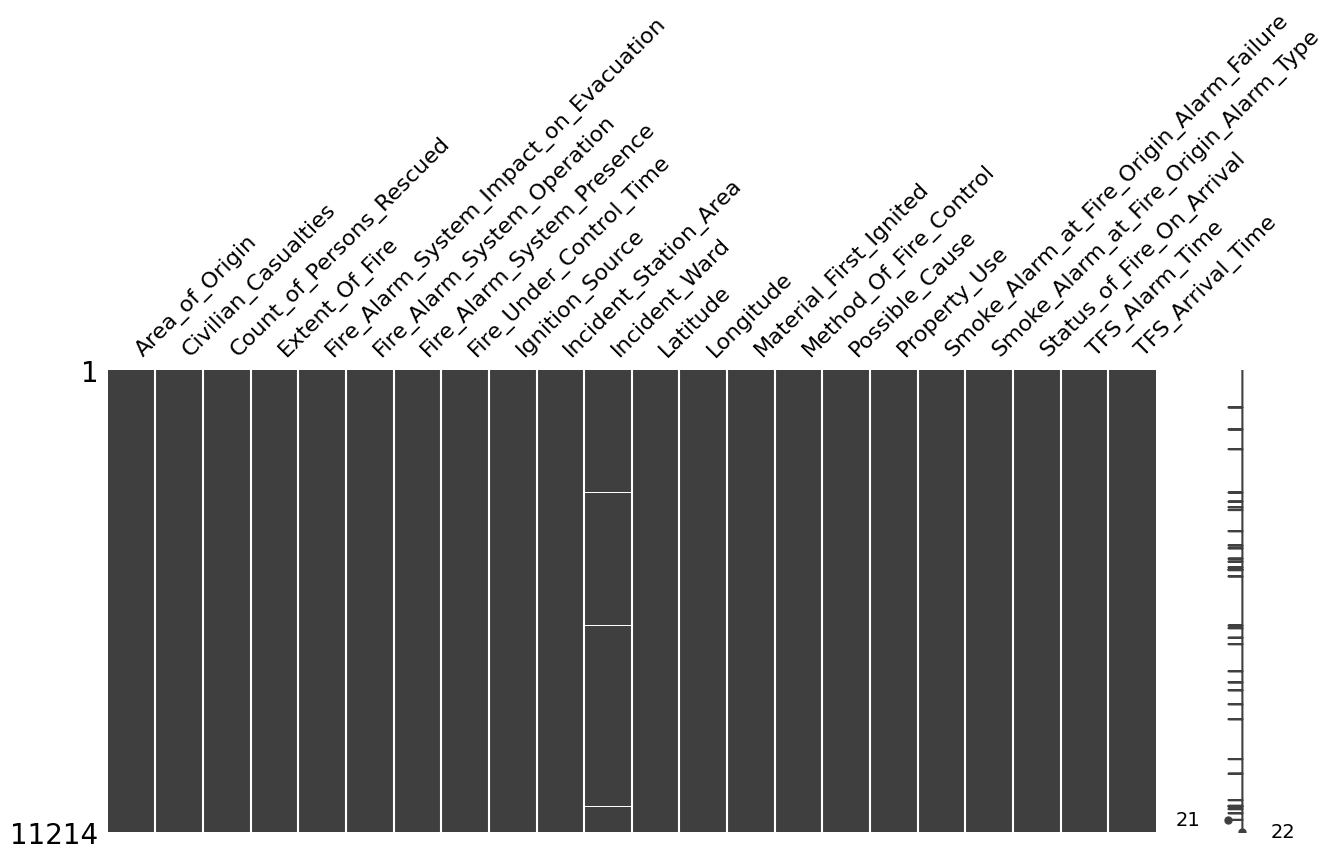

In [463]:
# Wizualizacja brakujących danych
ms.matrix(df, figsize=(15, 6))

# Białe Przestrzenie: Białe przestrzenie na wykresie wskazują na brakujące wartości dla danej zmiennej.
# Im więcej białych przestrzeni w kolumnie, tym więcej brakujących danych dla tej zmiennej. Wykres ten jest przydatny do szybkiego zidentyfikowania wzorców brakujących danych, co może być pomocne w podejmowaniu decyzji dotyczących czyszczenia danych

In [464]:
df.isna().sum()

# df.isna().sum() jest używane do obliczenia liczby brakujących wartości (NaN) w każdej kolumnie DataFrame’u z biblioteki pandas. Metoda isna() zwraca nowy DataFrame z wartościami True tam, gdzie oryginalne dane są NaN (Not a Number), i False tam, gdzie dane są dostępne. Następnie, metoda sum() sumuje wartości True w każdej kolumnie, ponieważ True jest traktowane jako 1, a False jako 0. Wynik to seria liczby brakujących wartości dla każdej kolumny w DataFrame1.

Area_of_Origin                               0
Civilian_Casualties                          0
Count_of_Persons_Rescued                     0
Extent_Of_Fire                               0
Fire_Alarm_System_Impact_on_Evacuation       0
Fire_Alarm_System_Operation                  0
Fire_Alarm_System_Presence                   0
Fire_Under_Control_Time                      0
Ignition_Source                              0
Incident_Station_Area                        0
Incident_Ward                               33
Latitude                                     0
Longitude                                    0
Material_First_Ignited                       0
Method_Of_Fire_Control                       0
Possible_Cause                               0
Property_Use                                 0
Smoke_Alarm_at_Fire_Origin_Alarm_Failure     0
Smoke_Alarm_at_Fire_Origin_Alarm_Type        0
Status_of_Fire_On_Arrival                    0
TFS_Alarm_Time                               0
TFS_Arrival_T

In [465]:
df.dropna(inplace= True)

# df.dropna(inplace=True) wywołuje metodę dropna na DataFrame df, która usuwa wiersze z brakującymi danymi (NaN). Parametr inplace=True oznacza, że zmiany zostaną dokonane bezpośrednio w oryginalnym DataFrame df

In [466]:
df.isna().sum() # teraz nie mamy NaN

Area_of_Origin                              0
Civilian_Casualties                         0
Count_of_Persons_Rescued                    0
Extent_Of_Fire                              0
Fire_Alarm_System_Impact_on_Evacuation      0
Fire_Alarm_System_Operation                 0
Fire_Alarm_System_Presence                  0
Fire_Under_Control_Time                     0
Ignition_Source                             0
Incident_Station_Area                       0
Incident_Ward                               0
Latitude                                    0
Longitude                                   0
Material_First_Ignited                      0
Method_Of_Fire_Control                      0
Possible_Cause                              0
Property_Use                                0
Smoke_Alarm_at_Fire_Origin_Alarm_Failure    0
Smoke_Alarm_at_Fire_Origin_Alarm_Type       0
Status_of_Fire_On_Arrival                   0
TFS_Alarm_Time                              0
TFS_Arrival_Time                  

In [467]:
assert (df.isna().sum().sum() == 0), "There are still missing values !"
print('No missing values in dataset !') 

# jest wyrażeniem assert, które sprawdza, czy warunek podany jako pierwszy argument jest prawdziwy. Jeśli warunek jest fałszywy, program zatrzyma się i wyświetli komunikat błędu podany jako drugi argument12. W tym przypadku, df.isna().sum().sum() oblicza całkowitą liczbę brakujących wartości w DataFrame df3. Jeśli liczba ta nie jest równa 0, oznacza to, że w DataFrame są jeszcze brakujące wartości i zostanie wyświetlony błąd AssertionError z komunikatem “There are still missing values !”

No missing values in dataset !


In [ ]:
## Data Type Change

In [468]:
# Change to datetime

df['TFS_Alarm_Time'] = pd.to_datetime(df['TFS_Alarm_Time']) 

# w Pythonie konwertuje kolumnę TFS_Alarm_Time w DataFrame df na typ danych datetime za pomocą funkcji pd.to_datetime z biblioteki pandas. Oznacza to, że wszystkie wartości w kolumnie TFS_Alarm_Time, które były wcześniej w formacie tekstowym lub innym formacie daty i czasu, zostaną przekształcone na obiekty datetime, które są bardziej elastyczne i łatwiejsze do manipulowania w analizie danych

In [469]:
df.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,0,86,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24T17:06:28,Undetermined,114,18.0,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24 16:49:36,2018-08-24T16:54:09
1,Cooking Area or Kitchen,0,28,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24T07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24 07:09:12,2018-11-24T07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",1,16,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09T18:36:21,Undetermined,325,27.0,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09 17:45:07,2017-02-09T17:48:49
3,Undetermined (formerly 98),0,12,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30T01:28:48,Undetermined,332,20.0,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30 00:42:01,2012-10-30T00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",8,11,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08T04:38:28,Matches or Lighters (unable to distinguish),442,5.0,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08 04:08:50,2018-07-08T04:13:54


In [470]:
# Change to datetime
df['TFS_Arrival_Time'] = pd.to_datetime(df['TFS_Arrival_Time'])

In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11181 entries, 0 to 11213
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Area_of_Origin                            11181 non-null  object        
 1   Civilian_Casualties                       11181 non-null  int64         
 2   Count_of_Persons_Rescued                  11181 non-null  int64         
 3   Extent_Of_Fire                            11181 non-null  object        
 4   Fire_Alarm_System_Impact_on_Evacuation    11181 non-null  object        
 5   Fire_Alarm_System_Operation               11181 non-null  object        
 6   Fire_Alarm_System_Presence                11181 non-null  object        
 7   Fire_Under_Control_Time                   11181 non-null  object        
 8   Ignition_Source                           11181 non-null  object        
 9   Incident_Station_Area            

In [472]:
# Change to datetime
df['Fire_Under_Control_Time'] = pd.to_datetime(df['Fire_Under_Control_Time'])

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11181 entries, 0 to 11213
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Area_of_Origin                            11181 non-null  object        
 1   Civilian_Casualties                       11181 non-null  int64         
 2   Count_of_Persons_Rescued                  11181 non-null  int64         
 3   Extent_Of_Fire                            11181 non-null  object        
 4   Fire_Alarm_System_Impact_on_Evacuation    11181 non-null  object        
 5   Fire_Alarm_System_Operation               11181 non-null  object        
 6   Fire_Alarm_System_Presence                11181 non-null  object        
 7   Fire_Under_Control_Time                   11181 non-null  datetime64[ns]
 8   Ignition_Source                           11181 non-null  object        
 9   Incident_Station_Area            

In [ ]:
## Feature Enginering

# Feature Engineering, czyli inżynieria cech, to proces polegający na przekształcaniu surowych danych w format, który lepiej nadaje się do modelowania w uczeniu maszynowym. W Pythonie, jest to często realizowane za pomocą bibliotek takich jak pandas, NumPy, scikit-learn, i innych, które oferują narzędzia do przetwarzania danych

In [474]:
 ((df['Civilian_Casualties'] > 0) & (df['Civilian_Casualties'] < 1)).sum()

0

In [24]:
(df['Civilian_Casualties'] > 1).sum() # mamy 181 większych niż 1 ofiar cywilnych.

181

In [25]:
df.loc[df['Civilian_Casualties'] > 0, ['Civilian_Casualties']] = 1 

# używa metody loc z biblioteki pandas, aby przypisać wartość 1 do wszystkich wierszy w kolumnie Civilian_Casualties DataFrame df, gdzie wartość jest większa niż 0. Innymi słowy, jeśli jakikolwiek wiersz w kolumnie Civilian_Casualties ma wartość większą niż 0, zostanie ona zastąpiona przez 1. Jest to często stosowane w procesie przygotowania danych, aby przekształcić zmienne liczbowe w zmienne binarne, co może być przydatne w analizie lub modelowaniu statystycznym

In [26]:
(df['Civilian_Casualties'] > 1).sum()

0

In [27]:
df['Civilian_Casualties'].value_counts()

Civilian_Casualties
0    10233
1      948
Name: count, dtype: int64

In [28]:
# df['Property_Use'].value_counts() jest używane do zliczenia liczby wystąpień każdej unikalnej wartości w kolumnie Property_Use DataFrame’u df. Metoda value_counts() zwraca serię, w której indeksy reprezentują unikalne wartości, a wartości serii to odpowiadające im liczby wystąpień.

# Check 
df['Property_Use'].value_counts()

# 

Property_Use
Multi-Unit Dwelling - Over 12 Units                               3716
Detached Dwelling                                                 2309
Semi-Detached Dwelling                                             727
Attached Dwelling (eg. rowhouse, townhouse, etc.)                  577
Multi-Unit Dwelling - 2 to 6 Units                                 279
                                                                  ... 
Hotel, Motel, Lodging - Less than 4 guests or suites (inc B&B)       1
Market - Outdoors (flowers, fruit, vegetable sales)                  1
Automobile                                                           1
Sto: Tank, Tank Farm, Other Liquids                                  1
Heating Plant - central/district heating plant, steam, etc           1
Name: count, Length: 217, dtype: int64

In [29]:
df['Property_Use']

# Kod i opis użytkowania nieruchomości

0        Multi-Unit Dwelling - Over 12 Units
1                                  Infirmary
2        Multi-Unit Dwelling - Over 12 Units
3           Clothing Store, Accessories, fur
4        Multi-Unit Dwelling - Over 12 Units
                        ...                 
11209    Multi-Unit Dwelling - Over 12 Units
11210                General Business Office
11211                General Business Office
11212    Multi-Unit Dwelling - Over 12 Units
11213                         Hardware Store
Name: Property_Use, Length: 11181, dtype: object

In [488]:
# Create columns with minues between TFS_Arrival_Time - TFS_Alarm_Time. Czas reakcji. Od czasu powiadomienia do czasu przybycia na miejsce

df['Response_Times'] = ((df['TFS_Arrival_Time'] - df['TFS_Alarm_Time']) / pd.Timedelta(minutes= 1)).round(2)

# pd.Timedelta(minutes=1) tworzy obiekt Timedelta reprezentujący jedną minutę.
# Dzielenie różnicy czasowej przez pd.Timedelta(minutes=1) konwertuje wynik na liczbę minut.

In [489]:
df['Response_Times']

0        4.55
1        5.18
2        3.70
3        2.95
4        5.07
         ... 
11209    3.50
11210    6.23
11211    4.57
11212    4.58
11213    4.85
Name: Response_Times, Length: 11181, dtype: float64

In [486]:
df['Fire_duration'] = ((df['Fire_Under_Control_Time'] - df['TFS_Alarm_Time']) / pd.Timedelta(minutes= 1)).round(2)

In [487]:
df['Fire_duration'] # czas trwania pożaru

0        16.87
1         9.80
2        51.23
3        46.78
4        29.63
         ...  
11209    15.22
11210    33.42
11211     9.45
11212    13.98
11213    52.90
Name: Fire_duration, Length: 11181, dtype: float64

In [192]:
### Encoding

In [34]:
# lab_encoder = LabelEncoder() odnosi się do procesu kodowania etykiet (ang. label encoding), który jest często stosowany w uczeniu maszynowym do przekształcania kategorialnych danych tekstowych na dane liczbowe, które mogą być przetwarzane przez algorytmy.

# Label Encoding
lab_encoder = LabelEncoder()

In [35]:
# New Function
def encode_labels(list) :
    """ Function that encode columns to label

    Args: 
        list -> type List, columns that need to be encoded
    return dataframe
    """
    for col in list:
        df[col] = lab_encoder.fit_transform(df[col])
    return df

# list: Lista zawierająca nazwy kolumn w DataFrame df, które mają być zakodowane. Typem tego argumentu jest List

# Dla każdej kolumny col w liście, funkcja używa instancji lab_encoder klasy LabelEncoder do dopasowania i transformacji wartości tekstowych na liczby całkowite. Operacja fit_transform dopasowuje lab_encoder do danych w kolumnie col i jednocześnie transformuje te dane na zakodowane etykiety.

# Po zakodowaniu wszystkich kolumn z listy, funkcja zwraca zmodyfikowany DataFrame df z zakodowanymi kolumnami.

# Ta funkcja jest przydatna w przetwarzaniu wstępnym danych przed ich użyciem w modelach uczenia maszynowego, które wymagają danych numerycznych, a nie tekstowych.

# Przed użyciem tej funkcji, musisz mieć zainstalowaną bibliotekę scikit-learn i musisz utworzyć instancję LabelEncoder o nazwie lab_encoder. Ponadto, funkcja ta modyfikuje DataFrame df w miejscu, więc oryginalne tekstowe wartości kolumn zostaną zastąpione zakodowanymi etykietami.

In [475]:
df.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,0,86,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24 17:06:28,Undetermined,114,18.0,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24 16:49:36,2018-08-24 16:54:09
1,Cooking Area or Kitchen,0,28,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24 07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24 07:09:12,2018-11-24 07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",1,16,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09 18:36:21,Undetermined,325,27.0,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09 17:45:07,2017-02-09 17:48:49
3,Undetermined (formerly 98),0,12,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30 01:28:48,Undetermined,332,20.0,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30 00:42:01,2012-10-30 00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",8,11,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08 04:38:28,Matches or Lighters (unable to distinguish),442,5.0,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08 04:08:50,2018-07-08 04:13:54


In [37]:
df[df['Area_of_Origin'] == 'Porch or Balcony']['Area_of_Origin'].count() # suma ile było wypadków w na ganku albo na balkonie

950

In [38]:
df[df['Area_of_Origin'] == 'Cooking Area or Kitchen']['Area_of_Origin'].count() # suma ile było wypadków w kuchni

2865

In [111]:
# columns_to_lab_encode = ['Area_of_Origin', 'Extent_Of_Fire', 'Fire_Alarm_System_Impact_on_Evacuation', 'Ignition_Source', 'Material_First_Ignited', 'Method_Of_Fire_Control', 'Possible_Cause', 'Status_of_Fire_On_Arrival']


In [112]:
# Wywołaj funkcję na liście kolumn
# df = encode_labels(columns_to_lab_encode)

In [39]:
df.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,Response_Times,Fire_duration
0,Porch or Balcony,0,86,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24 17:06:28,Undetermined,114,18.0,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24 16:49:36,2018-08-24 16:54:09,4.55,16.87
1,Cooking Area or Kitchen,0,28,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24 07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24 07:09:12,2018-11-24 07:14:23,5.18,9.80
2,"Living Area (e.g. living, TV, recreation, etc)",1,16,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09 18:36:21,Undetermined,325,27.0,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09 17:45:07,2017-02-09 17:48:49,3.70,51.23
3,Undetermined (formerly 98),0,12,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30 01:28:48,Undetermined,332,20.0,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30 00:42:01,2012-10-30 00:44:58,2.95,46.78
4,"Sleeping Area or Bedroom (inc. patients room, ...",1,11,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08 04:38:28,Matches or Lighters (unable to distinguish),442,5.0,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08 04:08:50,2018-07-08 04:13:54,5.07,29.63


In [117]:
# df[df['Area_of_Origin'] == 51 ]['Area_of_Origin'].count() # też 950. Więc oznaczenie 51 :)

950

In [118]:
# df[df['Area_of_Origin'] == 11 ]['Area_of_Origin'].count() 

2865

In [40]:
df['Fire_Alarm_System_Operation'].value_counts()

# Zwraca liczbę wystąpień każdej unikalnej wartości w kolumnie

Fire_Alarm_System_Operation
Fire alarm system operated                  4513
Not applicable (no system)                  3858
Fire alarm system operation undetermined    1417
Fire alarm system did not operate           1393
Name: count, dtype: int64

In [41]:
df['Fire_Alarm_System_Presence'].value_counts()

# Zwraca liczbę wystąpień każdej unikalnej wartości w kolumnie

Fire_Alarm_System_Presence
Fire alarm system present                                                 6208
Not applicable (bldg not classified by OBC OR detached/semi/town home)    1935
No Fire alarm system                                                      1788
Undetermined                                                              1250
Name: count, dtype: int64

In [476]:
# W Pythonie, używając biblioteki pandas, metoda pd.get_dummies() jest stosowana do tworzenia zmiennych wskaźnikowych (ang. dummy variables) dla danych kategorycznych. Oznacza to, że dla każdej kolumny wymienionej w parametrze columns, metoda ta utworzy nową kolumnę dla każdej unikalnej wartości w oryginalnej kolumnie, a następnie przypisze wartość 1 lub 0 w zależności od tego, czy dana wartość występuje w danym wierszu.

# Dla każdej kolumny w liście ['Fire_Alarm_System_Operation', 'Fire_Alarm_System_Presence'], tworzy nowe kolumny wskaźnikowe dla każdej unikalnej wartości w tych kolumnach.

# Każda nowa kolumna wskaźnikowa odpowiada jednej unikalnej wartości z oryginalnej kolumny.

# W nowych kolumnach wskaźnikowych, wiersz otrzymuje wartość 1, jeśli oryginalna kolumna miała tę wartość, w przeciwnym razie 0.

# Na przykład, jeśli kolumna Fire_Alarm_System_Operation zawiera wartości ‘Working’, ‘Not Working’, i ‘Unknown’, to pd.get_dummies() utworzy trzy nowe kolumny: Fire_Alarm_System_Operation_Working, Fire_Alarm_System_Operation_Not Working, i Fire_Alarm_System_Operation_Unknown. W każdej z tych kolumn, wiersze, które miały odpowiednią wartość w oryginalnej kolumnie, otrzymają 1, a wszystkie inne wiersze otrzymają 0.

# To jest przydatne w modelowaniu statystycznym i uczeniu maszynowym, ponieważ pozwala na przetwarzanie danych kategorycznych w formie, którą można łatwo wykorzystać w algorytmach.

df = pd.get_dummies(df, columns= ['Fire_Alarm_System_Operation', 'Fire_Alarm_System_Presence'])

In [477]:
df.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,Fire_Alarm_System_Operation_Fire alarm system did not operate,Fire_Alarm_System_Operation_Fire alarm system operated,Fire_Alarm_System_Operation_Fire alarm system operation undetermined,Fire_Alarm_System_Operation_Not applicable (no system),Fire_Alarm_System_Presence_Fire alarm system present,Fire_Alarm_System_Presence_No Fire alarm system,Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home),Fire_Alarm_System_Presence_Undetermined
0,Porch or Balcony,0,86,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,2018-08-24 17:06:28,Undetermined,114,18.0,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24 16:49:36,2018-08-24 16:54:09,True,False,False,False,True,False,False,False
1,Cooking Area or Kitchen,0,28,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,2018-11-24 07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24 07:09:12,2018-11-24 07:14:23,False,True,False,False,True,False,False,False
2,"Living Area (e.g. living, TV, recreation, etc)",1,16,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,2017-02-09 18:36:21,Undetermined,325,27.0,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09 17:45:07,2017-02-09 17:48:49,False,True,False,False,True,False,False,False
3,Undetermined (formerly 98),0,12,Entire Structure,Undetermined,2012-10-30 01:28:48,Undetermined,332,20.0,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30 00:42:01,2012-10-30 00:44:58,False,False,True,False,False,False,False,True
4,"Sleeping Area or Bedroom (inc. patients room, ...",8,11,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,2018-07-08 04:38:28,Matches or Lighters (unable to distinguish),442,5.0,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08 04:08:50,2018-07-08 04:13:54,False,True,False,False,True,False,False,False


In [42]:
df['Fire_Alarm_System_Operation_Fire alarm system did not operate'].sum() # System sygnalizacji pożaru nie zadziałał

1393

In [43]:
df["Fire_Alarm_System_Operation_Fire alarm system operated"].sum() # Uruchomienie systemu sygnalizacji pożaru

4513

In [44]:
df["Fire_Alarm_System_Operation_Fire alarm system operation undetermined"].sum() # Działanie systemu sygnalizacji pożaru Działanie systemu sygnalizacji pożaru nieokreślone

1417

In [45]:
df["Fire_Alarm_System_Operation_Not applicable (no system)"].sum() # Działanie systemu Fire_Alarm_System Nie dotyczy (brak systemu)

3858

In [50]:
df["Fire_Alarm_System_Presence_Fire alarm system present"].sum() # Obecność systemu sygnalizacji pożaru. Obecność systemu sygnalizacji pożaru

6208

In [51]:
df["Fire_Alarm_System_Presence_No Fire alarm system"].sum() # Obecność systemu sygnalizacji pożaru Brak systemu sygnalizacji pożaru

1788

In [52]:
df["Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home)"].sum() 
# Obecność systemu sygnalizacji pożaru Nie dotyczy (budynek niesklasyfikowany przez OBC LUB dom jednorodzinny/częściowo/miejski

1935

In [53]:
df["Fire_Alarm_System_Presence_Undetermined"].sum() # Nieokreślona obecność systemu sygnalizacji pożaru

1250

In [ ]:
#### Model

In [491]:
df_mode = df.copy()

In [492]:
df_mode.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,Fire_Alarm_System_Operation_Fire alarm system did not operate,Fire_Alarm_System_Operation_Fire alarm system operated,Fire_Alarm_System_Operation_Fire alarm system operation undetermined,Fire_Alarm_System_Operation_Not applicable (no system),Fire_Alarm_System_Presence_Fire alarm system present,Fire_Alarm_System_Presence_No Fire alarm system,Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home),Fire_Alarm_System_Presence_Undetermined,Fire_duration,Response_Times
0,Porch or Balcony,0,86,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,2018-08-24 17:06:28,Undetermined,114,18.0,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24 16:49:36,2018-08-24 16:54:09,True,False,False,False,True,False,False,False,16.87,4.55
1,Cooking Area or Kitchen,0,28,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,2018-11-24 07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24 07:09:12,2018-11-24 07:14:23,False,True,False,False,True,False,False,False,9.80,5.18
2,"Living Area (e.g. living, TV, recreation, etc)",1,16,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,2017-02-09 18:36:21,Undetermined,325,27.0,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09 17:45:07,2017-02-09 17:48:49,False,True,False,False,True,False,False,False,51.23,3.70
3,Undetermined (formerly 98),0,12,Entire Structure,Undetermined,2012-10-30 01:28:48,Undetermined,332,20.0,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30 00:42:01,2012-10-30 00:44:58,False,False,True,False,False,False,False,True,46.78,2.95
4,"Sleeping Area or Bedroom (inc. patients room, ...",8,11,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,2018-07-08 04:38:28,Matches or Lighters (unable to distinguish),442,5.0,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08 04:08:50,2018-07-08 04:13:54,False,True,False,False,True,False,False,False,29.63,5.07


In [493]:
# Save new dataset to csv
df_mode.to_csv('CSV/df_mode.csv')

In [160]:
# new_set_col_drop = ['Fire_Under_Control_Time', 'Property_Use', 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure', 'Smoke_Alarm_at_Fire_Origin_Alarm_Type']

In [161]:
# Drop non needed columns for model
#df_mode.drop(columns= new_set_col_drop, inplace= True)

In [494]:
df_mode.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Incident_Ward,Latitude,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,Fire_Alarm_System_Operation_Fire alarm system did not operate,Fire_Alarm_System_Operation_Fire alarm system operated,Fire_Alarm_System_Operation_Fire alarm system operation undetermined,Fire_Alarm_System_Operation_Not applicable (no system),Fire_Alarm_System_Presence_Fire alarm system present,Fire_Alarm_System_Presence_No Fire alarm system,Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home),Fire_Alarm_System_Presence_Undetermined,Fire_duration,Response_Times
0,Porch or Balcony,0,86,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,2018-08-24 17:06:28,Undetermined,114,18.0,43.760357,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24 16:49:36,2018-08-24 16:54:09,True,False,False,False,True,False,False,False,16.87,4.55
1,Cooking Area or Kitchen,0,28,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,2018-11-24 07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",142,7.0,43.754542,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24 07:09:12,2018-11-24 07:14:23,False,True,False,False,True,False,False,False,9.80,5.18
2,"Living Area (e.g. living, TV, recreation, etc)",1,16,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,2017-02-09 18:36:21,Undetermined,325,27.0,43.657300,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09 17:45:07,2017-02-09 17:48:49,False,True,False,False,True,False,False,False,51.23,3.70
3,Undetermined (formerly 98),0,12,Entire Structure,Undetermined,2012-10-30 01:28:48,Undetermined,332,20.0,43.649350,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30 00:42:01,2012-10-30 00:44:58,False,False,True,False,False,False,False,True,46.78,2.95
4,"Sleeping Area or Bedroom (inc. patients room, ...",8,11,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,2018-07-08 04:38:28,Matches or Lighters (unable to distinguish),442,5.0,43.697960,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08 04:08:50,2018-07-08 04:13:54,False,True,False,False,True,False,False,False,29.63,5.07


In [532]:
new_col_to_drop = ['Smoke_Alarm_at_Fire_Origin_Alarm_Failure', 'TFS_Alarm_Time', 'TFS_Arrival_Time', 'Ignition_Source', 'Material_First_Ignited', 'Possible_Cause','Incident_Station_Area', 'Incident_Ward', 'Property_Use', 'Smoke_Alarm_at_Fire_Origin_Alarm_Type', "Fire_Under_Control_Time","Latitude", "Longitude" ]

In [533]:
df_mode.drop(columns= new_col_to_drop, inplace= True)

In [751]:
df_mode.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Method_Of_Fire_Control,Status_of_Fire_On_Arrival,Fire_Alarm_System_Operation_Fire alarm system did not operate,Fire_Alarm_System_Operation_Fire alarm system operated,Fire_Alarm_System_Operation_Fire alarm system operation undetermined,Fire_Alarm_System_Operation_Not applicable (no system),Fire_Alarm_System_Presence_Fire alarm system present,Fire_Alarm_System_Presence_No Fire alarm system,Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home),Fire_Alarm_System_Presence_Undetermined,Fire_duration,Response_Times,Interaction
0,51,0,86,0,4,2,3,True,False,False,False,True,False,False,False,16.87,4.55,0.00
1,11,0,28,1,4,3,1,False,True,False,False,True,False,False,False,9.80,5.18,0.00
2,31,1,16,8,5,2,5,False,True,False,False,True,False,False,False,51.23,3.70,51.23
3,70,0,12,3,6,2,4,False,False,True,False,False,False,False,True,46.78,2.95,0.00
4,62,8,11,8,5,2,2,False,True,False,False,True,False,False,False,29.63,5.07,237.04


In [ ]:
# Status_of_Fire_On_Arrival: Może dostarczyć informacji o stanie pożaru przed interwencją.
# Fire_Alarm_System_Operation i Fire_Alarm_System_Presence: Ważne dla oceny gotowości budynku na pożar.
# Response_Times: Ważne dla oceny szybkości reakcji straży pożarnej.
# Fire_Alarm_System_Impact_on_Evacuation: Istotne dla oceny procesu ewakuacji.
# Extent_Of_Fire: Może wskazywać na potencjalne zagrożenie
# Count_of_Persons_Rescued: Ważne dla oceny skutków pożaru.
# Civilian_Casualties: Bezpośrednio odnosi się do zagrożenia dla ludzi.

In [ ]:
# drzewo decyzyjne

In [50]:
from sklearn.datasets import load_iris

from sklearn.tree import (
    DecisionTreeClassifier,
    plot_tree
)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend import plotting
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor


In [484]:
# lab_encoder = LabelEncoder() odnosi się do procesu kodowania etykiet (ang. label encoding), który jest często stosowany w uczeniu maszynowym do przekształcania kategorialnych danych tekstowych na dane liczbowe, które mogą być przetwarzane przez algorytmy.

# Label Encoding
lab_encoder = LabelEncoder()

In [298]:
# New Function
def encode_labels(list) :
    """ Function that encode columns to label

    Args: 
        list -> type List, columns that need to be encoded
    return dataframe
    """
    for col in list:
        df_mode[col] = lab_encoder.fit_transform(df_mode[col])
    return df_mode

# list: Lista zawierająca nazwy kolumn w DataFrame df, które mają być zakodowane. Typem tego argumentu jest List

# Dla każdej kolumny col w liście, funkcja używa instancji lab_encoder klasy LabelEncoder do dopasowania i transformacji wartości tekstowych na liczby całkowite. Operacja fit_transform dopasowuje lab_encoder do danych w kolumnie col i jednocześnie transformuje te dane na zakodowane etykiety.

# Po zakodowaniu wszystkich kolumn z listy, funkcja zwraca zmodyfikowany DataFrame df z zakodowanymi kolumnami.

# Ta funkcja jest przydatna w przetwarzaniu wstępnym danych przed ich użyciem w modelach uczenia maszynowego, które wymagają danych numerycznych, a nie tekstowych.

# Przed użyciem tej funkcji, musisz mieć zainstalowaną bibliotekę scikit-learn i musisz utworzyć instancję LabelEncoder o nazwie lab_encoder. Ponadto, funkcja ta modyfikuje DataFrame df w miejscu, więc oryginalne tekstowe wartości kolumn zostaną zastąpione zakodowanymi etykietami.

In [632]:
df_mode.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Method_Of_Fire_Control,Status_of_Fire_On_Arrival,Fire_Alarm_System_Operation_Fire alarm system did not operate,Fire_Alarm_System_Operation_Fire alarm system operated,Fire_Alarm_System_Operation_Fire alarm system operation undetermined,Fire_Alarm_System_Operation_Not applicable (no system),Fire_Alarm_System_Presence_Fire alarm system present,Fire_Alarm_System_Presence_No Fire alarm system,Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home),Fire_Alarm_System_Presence_Undetermined,Fire_duration,Response_Times
0,51,0,86,0,4,2,3,True,False,False,False,True,False,False,False,16.87,4.55
1,11,0,28,1,4,3,1,False,True,False,False,True,False,False,False,9.80,5.18
2,31,1,16,8,5,2,5,False,True,False,False,True,False,False,False,51.23,3.70
3,70,0,12,3,6,2,4,False,False,True,False,False,False,False,True,46.78,2.95
4,62,8,11,8,5,2,2,False,True,False,False,True,False,False,False,29.63,5.07


In [633]:
columns_to_lab_encode = ['Area_of_Origin', 'Extent_Of_Fire', 'Fire_Alarm_System_Impact_on_Evacuation', 'Method_Of_Fire_Control', 'Status_of_Fire_On_Arrival']

In [634]:
df_mode = encode_labels(columns_to_lab_encode)

In [635]:
df_mode.head(5)

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Method_Of_Fire_Control,Status_of_Fire_On_Arrival,Fire_Alarm_System_Operation_Fire alarm system did not operate,Fire_Alarm_System_Operation_Fire alarm system operated,Fire_Alarm_System_Operation_Fire alarm system operation undetermined,Fire_Alarm_System_Operation_Not applicable (no system),Fire_Alarm_System_Presence_Fire alarm system present,Fire_Alarm_System_Presence_No Fire alarm system,Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home),Fire_Alarm_System_Presence_Undetermined,Fire_duration,Response_Times
0,51,0,86,0,4,2,3,True,False,False,False,True,False,False,False,16.87,4.55
1,11,0,28,1,4,3,1,False,True,False,False,True,False,False,False,9.80,5.18
2,31,1,16,8,5,2,5,False,True,False,False,True,False,False,False,51.23,3.70
3,70,0,12,3,6,2,4,False,False,True,False,False,False,False,True,46.78,2.95
4,62,8,11,8,5,2,2,False,True,False,False,True,False,False,False,29.63,5.07


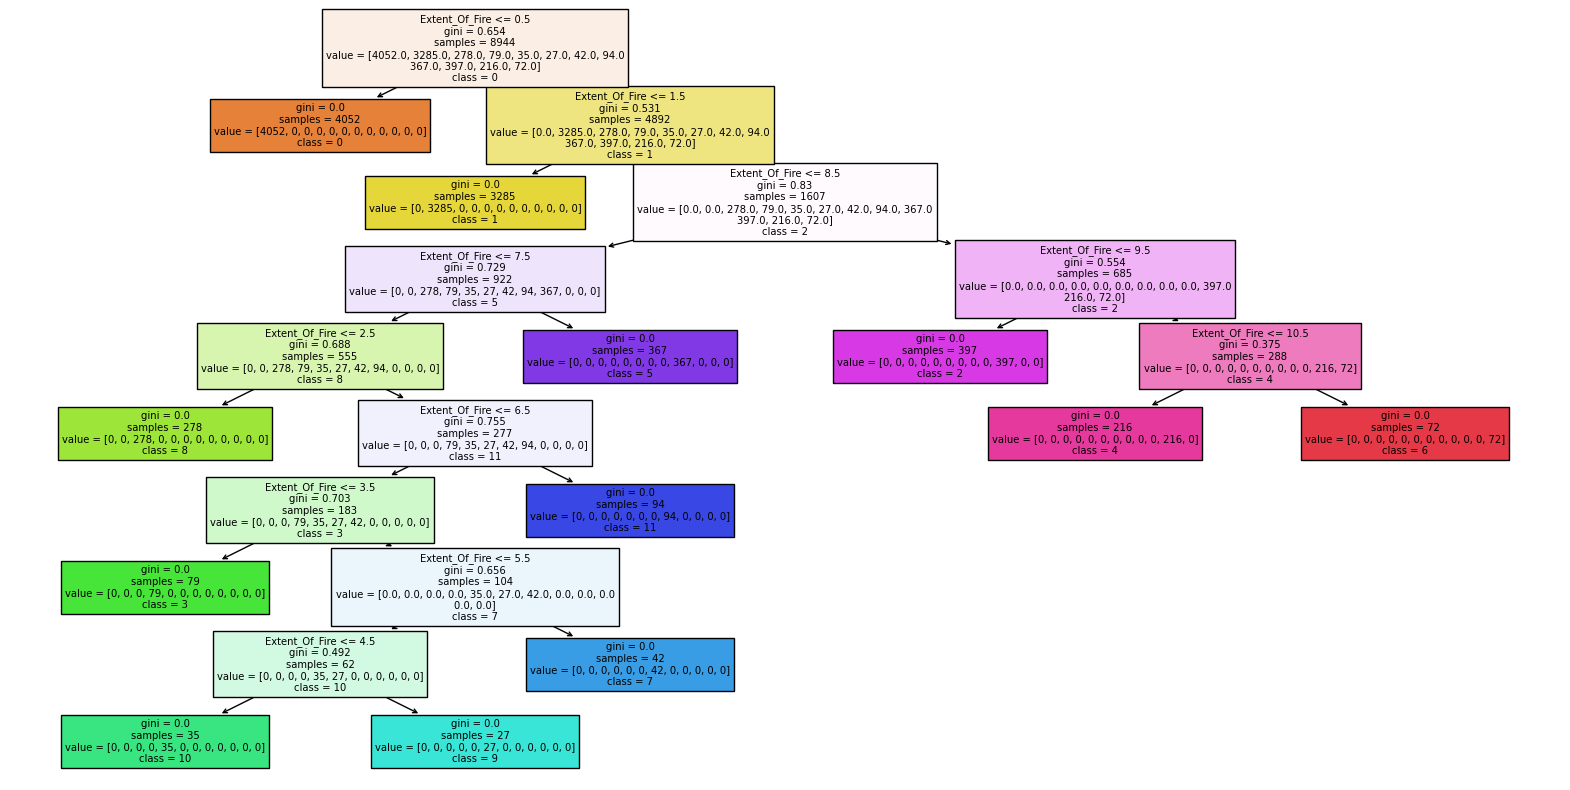

In [750]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


feature_cols = [
    'Area_of_Origin', 'Civilian_Casualties', 'Count_of_Persons_Rescued',
    'Extent_Of_Fire', 'Fire_Alarm_System_Impact_on_Evacuation',
    'Method_Of_Fire_Control', 'Status_of_Fire_On_Arrival',
    'Fire_Alarm_System_Operation_Fire alarm system did not operate',
    'Fire_Alarm_System_Operation_Fire alarm system operated',
    'Fire_Alarm_System_Operation_Fire alarm system operation undetermined',
    'Fire_Alarm_System_Operation_Not applicable (no system)',
    'Fire_Alarm_System_Presence_Fire alarm system present',
    'Fire_Alarm_System_Presence_No Fire alarm system',
    'Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home)',
    'Fire_Alarm_System_Presence_Undetermined', 'Fire_duration',
    'Response_Times']


X = df_mode[feature_cols]
y = df_mode['Extent_Of_Fire']  # Extent_Of_Fire to kolumna, którą chcemy przewidzieć

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Utworzenie i trenowanie modelu drzewa decyzyjnego
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Wizualizacja drzewa decyzyjnego
plt.figure(figsize=(20, 10))

class_names = df_mode["Extent_Of_Fire"].unique().astype(str).tolist()

plot_tree(tree_clf, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

In [638]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Przewidywanie na zbiorze testowym
y_pred = tree_clf.predict(X_test)

# Obliczanie metryk
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

# Wyświetlanie metryk
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[1057    0    0    0    0    0    0    0    0    0    0    0]
 [   0  787    0    0    0    0    0    0    0    0    0    0]
 [   0    0   62    0    0    0    0    0    0    0    0    0]
 [   0    0    0   20    0    0    0    0    0    0    0    0]
 [   0    0    0    0    6    0    0    0    0    0    0    0]
 [   0    0    0    0    0    7    0    0    0    0    0    0]
 [   0    0    0    0    0    0   14    0    0    0    0    0]
 [   0    0    0    0    0    0    0   26    0    0    0    0]
 [   0    0    0    0    0    0    0    0  100    0    0    0]
 [   0    0    0    0    0    0    0    0    0   82    0    0]
 [   0    0    0    0    0    0    0    0    0    0   58    0]
 [   0    0    0    0    0    0    0    0    0    0    0   18]]


In [743]:
feature_names =  [
    'Area_of_Origin', 'Civilian_Casualties', 'Count_of_Persons_Rescued',
    'Extent_Of_Fire', 'Fire_Alarm_System_Impact_on_Evacuation',
    'Method_Of_Fire_Control', 'Status_of_Fire_On_Arrival',
    'Fire_Alarm_System_Operation_Fire alarm system did not operate',
    'Fire_Alarm_System_Operation_Fire alarm system operated',
    'Fire_Alarm_System_Operation_Fire alarm system operation undetermined',
    'Fire_Alarm_System_Operation_Not applicable (no system)',
    'Fire_Alarm_System_Presence_Fire alarm system present',
    'Fire_Alarm_System_Presence_No Fire alarm system',
    'Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home)',
    'Fire_Alarm_System_Presence_Undetermined', 'Fire_duration']
model_reg= DecisionTreeRegressor(random_state=0, max_depth = 3).fit(df_mode[feature_names], df_mode['Extent_Of_Fire'])

In [744]:
model_reg

DecisionTreeRegressor(max_depth=3, random_state=0)

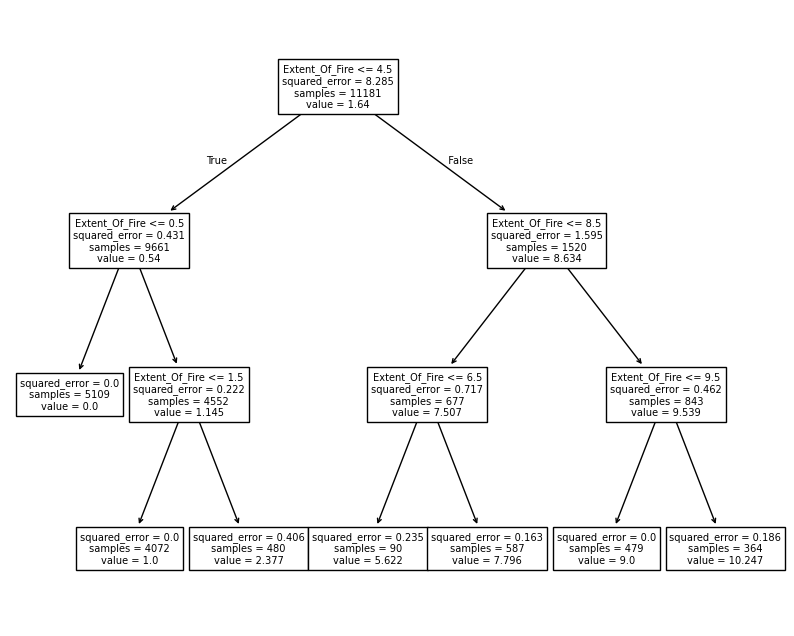

In [745]:
plt.figure(figsize=(10,8))
plot_tree(model_reg, feature_names = feature_names);

In [746]:
X_train, X_test, y_train, y_test = train_test_split(df_mode[feature_names], df_mode['Extent_Of_Fire'], test_size=0.2, random_state=0)

# Podział danych na zestawy treningowe i testowe

In [747]:
model_reg = DecisionTreeRegressor(random_state=0, max_depth=3)
model_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [748]:
y_pred = model_reg.predict(X_test)
y_pred

array([0., 0., 1., ..., 0., 1., 0.])

In [749]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

MSE: 0.032481104442489535
RMSE: 0.18022514930633166
R^2: 0.9961913968819294


c:\Users\barto\anaconda3\envs\infoshare_virtual_e\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
## Time series

In [753]:
import plotly.express as px

In [757]:
df_mode.columns

Index(['Area_of_Origin', 'Civilian_Casualties', 'Count_of_Persons_Rescued',
       'Extent_Of_Fire', 'Fire_Alarm_System_Impact_on_Evacuation',
       'Method_Of_Fire_Control', 'Status_of_Fire_On_Arrival',
       'Fire_Alarm_System_Operation_Fire alarm system did not operate',
       'Fire_Alarm_System_Operation_Fire alarm system operated',
       'Fire_Alarm_System_Operation_Fire alarm system operation undetermined',
       'Fire_Alarm_System_Operation_Not applicable (no system)',
       'Fire_Alarm_System_Presence_Fire alarm system present',
       'Fire_Alarm_System_Presence_No Fire alarm system',
       'Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home)',
       'Fire_Alarm_System_Presence_Undetermined', 'Fire_duration',
       'Response_Times', 'Interaction'],
      dtype='object')

In [788]:
fig = px.scatter(df_mode, x='Response_Times', y='Count_of_Persons_Rescued')
# Ustawienie zakresu osi X
fig.update_xaxes(range=[0, 30])
fig.show()

In [763]:
fig = px.scatter(df, x='Fire_duration', y='Extent_Of_Fire', title='Związek między czasem trwania pożaru a jego zakresem')
fig.show()

In [771]:
fig = px.scatter(df, x='Fire_duration', y='Civilian_Casualties', title='Związek między czasem trwania pożaru a jego zakresem')
fig.show()

In [789]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [815]:
seasonal_decomp = seasonal_decompose(df_mode['Fire_duration'], model='multiplicative', period=12) 

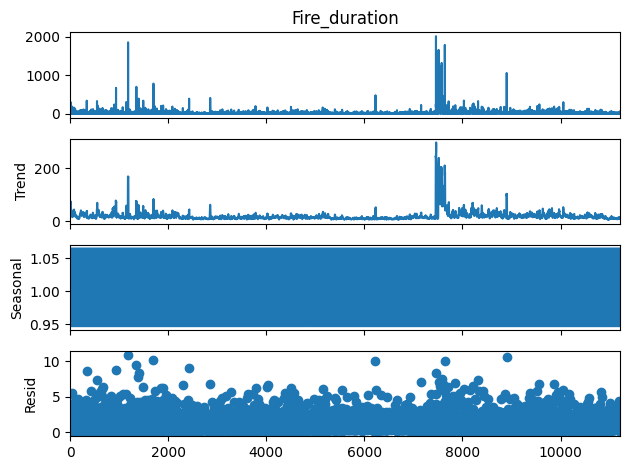

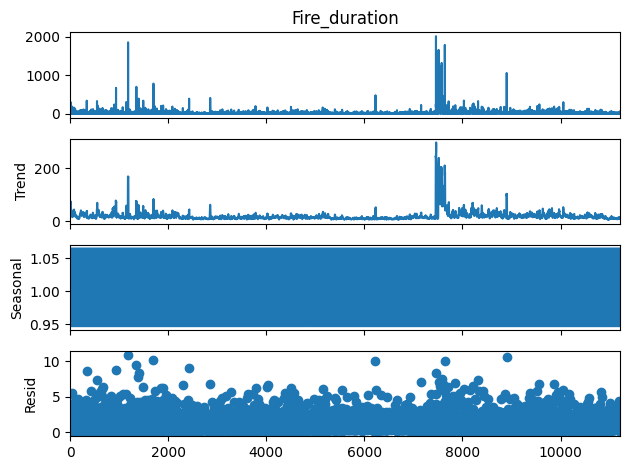

In [816]:
seasonal_decomp.plot()

In [783]:
fig = px.bar(df_mode, x='Area_of_Origin', y='Civilian_Casualties', title='Ofiary cywilne w zależności od obszaru pochodzenia')
fig.show()

# Cooking Area or Kitchen to 11

In [807]:
fig = px.bar(df_mode, x='Area_of_Origin', y='Count_of_Persons_Rescued', title='Liczba uratowanych osób zależności od obszaru pochodzenia')
fig.show()

In [828]:
df_mode['Civilian_Casualties'].sum()

1259

In [830]:
df_mode['Count_of_Persons_Rescued'].sum()

697

In [832]:
df_mode.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Method_Of_Fire_Control,Status_of_Fire_On_Arrival,Fire_Alarm_System_Operation_Fire alarm system did not operate,Fire_Alarm_System_Operation_Fire alarm system operated,Fire_Alarm_System_Operation_Fire alarm system operation undetermined,Fire_Alarm_System_Operation_Not applicable (no system),Fire_Alarm_System_Presence_Fire alarm system present,Fire_Alarm_System_Presence_No Fire alarm system,Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home),Fire_Alarm_System_Presence_Undetermined,Fire_duration,Response_Times,Interaction
0,51,0,86,0,4,2,3,True,False,False,False,True,False,False,False,16.87,4.55,0.00
1,11,0,28,1,4,3,1,False,True,False,False,True,False,False,False,9.80,5.18,0.00
2,31,1,16,8,5,2,5,False,True,False,False,True,False,False,False,51.23,3.70,51.23
3,70,0,12,3,6,2,4,False,False,True,False,False,False,False,True,46.78,2.95,0.00
4,62,8,11,8,5,2,2,False,True,False,False,True,False,False,False,29.63,5.07,237.04


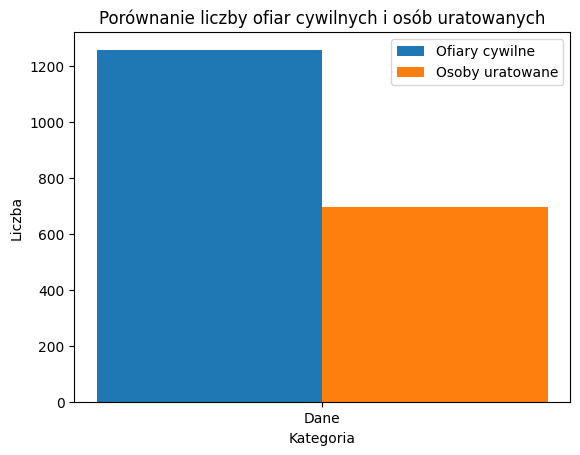

In [869]:

ofiary_cywilne = df_mode['Civilian_Casualties'].sum()
osoby_uratowane = df_mode['Count_of_Persons_Rescued'].sum()

bar_width = 0.35
index = np.arange(1)

fig, ax = plt.subplots()

bar1 = ax.bar(index, ofiary_cywilne, bar_width, label='Ofiary cywilne')
bar2 = ax.bar(index + bar_width, osoby_uratowane, bar_width, label='Osoby uratowane')

ax.set_xlabel('Kategoria')
ax.set_ylabel('Liczba')
ax.set_title('Porównanie liczby ofiar cywilnych i osób uratowanych')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Dane'])
ax.legend()


plt.show()

# bar_width to szerokość każdego słupka na wykresie.

In [859]:
df_mode.columns

Index(['Area_of_Origin', 'Civilian_Casualties', 'Count_of_Persons_Rescued',
       'Extent_Of_Fire', 'Fire_Alarm_System_Impact_on_Evacuation',
       'Method_Of_Fire_Control', 'Status_of_Fire_On_Arrival',
       'Fire_Alarm_System_Operation_Fire alarm system did not operate',
       'Fire_Alarm_System_Operation_Fire alarm system operated',
       'Fire_Alarm_System_Operation_Fire alarm system operation undetermined',
       'Fire_Alarm_System_Operation_Not applicable (no system)',
       'Fire_Alarm_System_Presence_Fire alarm system present',
       'Fire_Alarm_System_Presence_No Fire alarm system',
       'Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home)',
       'Fire_Alarm_System_Presence_Undetermined', 'Fire_duration',
       'Response_Times', 'Interaction'],
      dtype='object')

In [863]:
# Obliczenie współczynnika korelacji Pearsona
correlation = df_mode['Fire_duration'].corr(df_mode['Extent_Of_Fire'])
print(f'Korelacja między czasem trwania pożaru a liczbą ofiar cywilnych: {correlation}')

Korelacja między czasem trwania pożaru a liczbą ofiar cywilnych: 0.1789210886289902


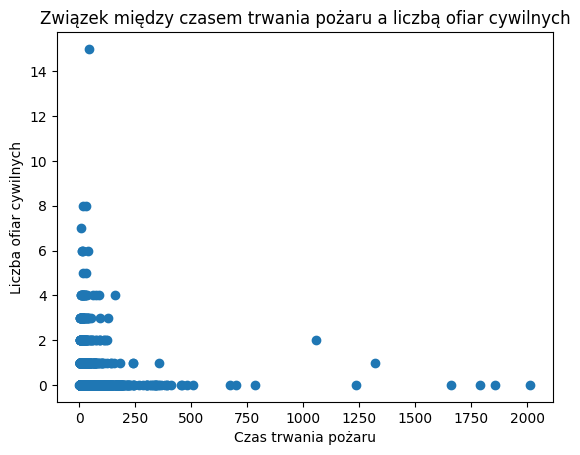

In [864]:
import matplotlib.pyplot as plt

plt.scatter(df_mode['Fire_duration'], df_mode['Civilian_Casualties'])
plt.xlabel('Czas trwania pożaru')
plt.ylabel('Liczba ofiar cywilnych')
plt.title('Związek między czasem trwania pożaru a liczbą ofiar cywilnych')
plt.show()

In [ ]:
## logistic regression

In [910]:
df_mode.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Method_Of_Fire_Control,Status_of_Fire_On_Arrival,Fire_Alarm_System_Operation_Fire alarm system did not operate,Fire_Alarm_System_Operation_Fire alarm system operated,Fire_Alarm_System_Operation_Fire alarm system operation undetermined,Fire_Alarm_System_Operation_Not applicable (no system),Fire_Alarm_System_Presence_Fire alarm system present,Fire_Alarm_System_Presence_No Fire alarm system,Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home),Fire_Alarm_System_Presence_Undetermined,Fire_duration,Response_Times,Interaction
0,51,0,86,0,4,2,3,True,False,False,False,True,False,False,False,16.87,4.55,0.00
1,11,0,28,1,4,3,1,False,True,False,False,True,False,False,False,9.80,5.18,0.00
2,31,1,16,8,5,2,5,False,True,False,False,True,False,False,False,51.23,3.70,51.23
3,70,0,12,3,6,2,4,False,False,True,False,False,False,False,True,46.78,2.95,0.00
4,62,8,11,8,5,2,2,False,True,False,False,True,False,False,False,29.63,5.07,237.04


In [933]:
train_x, test_x, train_y, test_y = train_test_split(df_mode.drop('Extent_Of_Fire',axis=1),df_mode['Extent_Of_Fire'])

In [934]:
test_x.head()

,Area_of_Origin,Civilian_Casualties,Count_of_Persons_Rescued,Fire_Alarm_System_Impact_on_Evacuation,Method_Of_Fire_Control,Status_of_Fire_On_Arrival,Fire_Alarm_System_Operation_Fire alarm system did not operate,Fire_Alarm_System_Operation_Fire alarm system operated,Fire_Alarm_System_Operation_Fire alarm system operation undetermined,Fire_Alarm_System_Operation_Not applicable (no system),Fire_Alarm_System_Presence_Fire alarm system present,Fire_Alarm_System_Presence_No Fire alarm system,Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home),Fire_Alarm_System_Presence_Undetermined,Fire_duration,Response_Times,Interaction
6825,11,0,0,3,3,1,False,False,False,True,False,False,False,True,3.62,3.60,0.00
5505,11,1,0,3,2,2,False,False,False,True,False,True,False,False,7.03,4.80,7.03
3410,21,0,0,3,2,5,False,False,False,True,False,False,True,False,16.35,5.30,0.00
7830,62,0,0,0,3,1,False,True,False,False,True,False,False,False,7.27,6.65,0.00
5177,11,0,0,3,3,1,False,False,False,True,False,True,False,False,6.15,5.93,0.00


In [935]:
model_1 = LogisticRegression().fit(train_x, train_y)

c:\Users\barto\anaconda3\envs\infoshare_virtual_e\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [936]:
model_1.coef_

array([[ 3.52319539e-03, -3.43178458e-02, -9.00979902e-02,
         1.25540776e-01,  6.56265110e-01, -2.42325431e-01,
         1.30965020e-01,  1.55925355e-01,  3.60378242e-02,
        -9.48417763e-02,  2.90989809e-01, -1.20654378e-01,
         1.70405659e-04,  5.75805873e-02, -2.09222809e-02,
         3.99239173e-01, -4.12140338e-02],
       [-7.20787661e-03, -2.26479295e-02,  2.28942444e-02,
         1.13680769e-01,  4.97432501e-01, -2.54705272e-01,
         1.94941779e-02,  3.22471695e-01, -7.79879556e-02,
        -3.15846602e-02,  3.40976279e-01,  3.53773918e-02,
        -3.33456671e-02, -1.10614747e-01, -8.04694609e-03,
         4.42536165e-01,  7.38720730e-03],
       [ 1.77343620e-03, -2.43092720e-02, -1.98251745e-02,
         1.60020054e-01, -1.01489609e-01,  1.44423509e-01,
         9.42160711e-04, -1.07169126e-01,  6.57328601e-02,
        -3.00521006e-03, -9.35924156e-02, -3.91326440e-03,
         2.70950201e-03,  5.12968629e-02, -5.53275565e-03,
        -3.86072538e-03, -2.0

In [937]:
model_1.feature_names_in_

array(['Area_of_Origin', 'Civilian_Casualties',
       'Count_of_Persons_Rescued',
       'Fire_Alarm_System_Impact_on_Evacuation', 'Method_Of_Fire_Control',
       'Status_of_Fire_On_Arrival',
       'Fire_Alarm_System_Operation_Fire alarm system did not operate',
       'Fire_Alarm_System_Operation_Fire alarm system operated',
       'Fire_Alarm_System_Operation_Fire alarm system operation undetermined',
       'Fire_Alarm_System_Operation_Not applicable (no system)',
       'Fire_Alarm_System_Presence_Fire alarm system present',
       'Fire_Alarm_System_Presence_No Fire alarm system',
       'Fire_Alarm_System_Presence_Not applicable (bldg not classified by OBC OR detached/semi/town home)',
       'Fire_Alarm_System_Presence_Undetermined', 'Fire_duration',
       'Response_Times', 'Interaction'], dtype=object)

In [938]:
pred_train = model_1.predict(train_x)
pred_train

array([1, 1, 0, ..., 0, 1, 8], dtype=int64)

In [939]:
pred_train_proba = model_1.predict_proba(train_x)
pred_train_proba 

array([[1.71610223e-01, 2.29706236e-01, 7.84412282e-02, ...,
        1.13062971e-01, 1.27699906e-01, 7.21363810e-04],
       [3.42621617e-01, 5.19300591e-01, 2.19101881e-02, ...,
        3.09359747e-02, 3.31960088e-02, 1.26045714e-03],
       [4.86016427e-01, 3.79150409e-01, 2.47808733e-02, ...,
        4.59086728e-02, 1.75181108e-02, 3.74408429e-03],
       ...,
       [4.93470040e-01, 2.90371057e-01, 6.58268650e-02, ...,
        5.39384690e-02, 2.68220051e-02, 7.22399196e-03],
       [4.26171898e-01, 5.25248124e-01, 7.38702396e-03, ...,
        1.59480937e-02, 9.77830699e-03, 1.77244399e-04],
       [1.04434369e-01, 1.85589081e-01, 7.12958538e-02, ...,
        9.92683494e-02, 1.23251706e-01, 2.54328679e-04]])

In [940]:
pred_train_proba = model_1.predict_proba(train_x)[:,1] # wszystkie wartości, a w środku te 1
pred_train_proba

array([0.22970624, 0.51930059, 0.37915041, ..., 0.29037106, 0.52524812,
       0.18558908])

In [941]:
dokladnosc = accuracy_score(train_y, pred_train)
print(f'Dokładność modelu: {dokladnosc}')

Dokładność modelu: 0.49147286821705427


In [942]:
from sklearn.metrics import confusion_matrix

In [943]:
confusion_matrix(train_y, pred_train)

array([[3171,  603,    4,    3,    0,    0,    0,    0,   15,    1,   13,
           0],
       [2133,  910,    3,    4,    0,    0,    0,    1,    8,    1,    8,
           0],
       [ 201,   41,    0,    0,    0,    0,    0,    0,    2,    0,    5,
           0],
       [  38,   23,    0,    6,    0,    0,    0,    0,    4,    0,    9,
           0],
       [   9,   12,    0,    0,    0,    0,    0,    0,    2,    1,    2,
           0],
       [  12,   11,    0,    1,    0,    0,    0,    0,    1,    0,    2,
           0],
       [  21,   16,    0,    2,    0,    0,    0,    0,    5,    0,    1,
           0],
       [  36,   27,    0,    5,    0,    0,    0,    1,    2,    0,   12,
           0],
       [ 179,  146,    0,    1,    0,    0,    0,    0,   11,    0,    6,
           0],
       [ 189,  178,    0,    0,    0,    0,    0,    0,    2,    1,    2,
           0],
       [  64,  109,    0,    6,    0,    0,    0,    0,   16,    0,   21,
           0],
       [  54,    8,  

In [945]:
pred_test_proba = model_1.predict_proba(test_x)[:,1]
pred_test_proba

array([0.33304756, 0.47410959, 0.29259052, ..., 0.27433737, 0.30287439,
       0.44048976])

In [950]:
pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [951]:
pred_train

array([1, 1, 0, ..., 0, 1, 8], dtype=int64)

In [952]:
dokladnosc = accuracy_score(test_y, pred_test)
print(f'Dokładność modelu: {dokladnosc}')

Dokładność modelu: 0.453862660944206


In [953]:
confusion_matrix(test_y, pred_test)

array([[1189,   87,   15,    4,    2,    0,    1,    0,    0,    0,    0,
           0,    1],
       [ 913,   80,    8,    2,    0,    0,    0,    0,    1,    0,    0,
           0,    0],
       [  84,    6,    0,    0,    0,    1,    0,    0,    0,    0,    0,
           0,    0],
       [  19,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  13,    1,    1,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   5,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  10,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  35,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [ 112,   11,    0,    1,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  99,    7,    1,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  50,    7,    0,    0,    1,    0,    0, 

In [983]:
pred_test_proba = model_1.predict_proba(test_x) [:,1]
pred_test_proba 

array([0.33304756, 0.47410959, 0.29259052, ..., 0.27433737, 0.30287439,
       0.44048976])

In [989]:
train_y

9163     11
9413      1
420       1
6166      0
938       1
         ..
3812      0
6440      1
1691      0
10352     5
8398      7
Name: Extent_Of_Fire, Length: 8385, dtype: int64